## Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')


## About Dataset
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

1. CUST_ID, Identifikasi Pemegang Kartu Kredit (categorical)
2. BALANCE, Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. BALANCE_FREQUENCY, Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. PURCHASES, Jumlah pembelian yang dilakukan dari akun
5. ONEOFF_PURCHASES, Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. INSTALLMENTS_PURCHASES, Jumlah pembelian dilakukan secara angsuran
7. CASH_ADVANCE, Uang tunai di muka yang diberikan oleh pengguna
8. PURCHASES_FREQUENCY, Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. ONEOFF_PURCHASES_FREQUENCY, How sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. PURCHASES_INSTALLMENTS_FREQUENCY, Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. CASH_ADVANCE_FREQUENCY, Seberapa sering uang tunai di muka dibayarkan
12. CASH_ADVANCE_TRX, Jumlah Transaksi yang dilakukan dengan "Cash in Advance\
13. PURCHASES_TRX, Jumlah transaksi pembelian yang dilakukan
14. CREDIT_LIMIT, Batas Kartu Kredit untuk pengguna
15. PAYMENTS, Jumlah Pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS, Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. PRC_FULL_PAYMENT, Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. TENURE, Jangka waktu layanan kartu kredit untuk pengguna

In [2]:
dataset = pd.read_csv("D:\HACTIVE\dataset\CC GENERAL.csv", delimiter=',', encoding = "utf-8")
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
dataset.columns = dataset.columns.str.lower()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [5]:
dataset.shape

(8950, 18)

Dataset ini memiliki jumlah data sebanyak 8636 dengan total 18 kolom.

## Data Cleaning

Pembersihan data adalah tahap yang sangat penting sebelum pengolahan data untuk analisis maupun modeling dilakukan. Pastikan data yang kita miliki sudah tidak mengandung missing values/invalid values, maupun data duplikat agar tidak terjadi bias pada analisis atau modeling yang dilakukan.

### Identify Missing Values

In [6]:
def check_missing_value(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percentage = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = True)
    return pd.concat([total, percentage], axis=1, keys = ['total', 'percentage'])

In [7]:
check_missing_value(dataset).style.background_gradient(cmap = 'Spectral')

,total,percentage
minimum_payments,313,3.497207
credit_limit,1,0.011173
cust_id,0,0.000000
balance,0,0.000000
prc_full_payment,0,0.000000
payments,0,0.000000
purchases_trx,0,0.000000
cash_advance_trx,0,0.000000
cash_advance_frequency,0,0.000000
purchases_installments_frequency,0,0.000000


In [8]:
dataset[dataset.isnull().any(axis=1)]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


Data diatas merupakan list data yang memiliki Null Values pada kolom <b>"minimum_payments"</b> atau <b>"credit_limit"</b> dengan total 314 baris data. Data yang kosong ini dapat diimpute dengan berbagai metode, salah satunya adalah impute dengan median atau mean. Dataset ini pada kolom <b>"minimum_payments"</b> yang memiliki 313 data kosong akan diimpute dengan median, dan <b>"credit_limit"</b> dengan 1 missing value akan diisi dengan mean.

In [9]:
dataset['minimum_payments'].fillna(dataset['minimum_payments'].median(), inplace=True)
dataset['credit_limit'].fillna(dataset['credit_limit'].mean(), inplace=True)

In [10]:
dataset.isnull().sum().sum()

0

In [11]:
dataset.shape

(8950, 18)

### Identify Duplicate Data

In [12]:
dataset.duplicated().values.any()

False

Tidak ada data yang duplikasi pada dataset ini.

In [13]:
dataset.tail()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


### Drop Unused Columns

Drop kolom pada dataset yang tidak dibutuhkan. Pada kasus ini, kolom <b>"cust_id"</b> tidak dibutuhkan untuk analisis maupun modeling.

In [14]:
dataset.drop(columns='cust_id', inplace=True)

## Exploratory Data Analysis

In [15]:
dataset.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Text(0.5, 1.0, 'Heat Map')

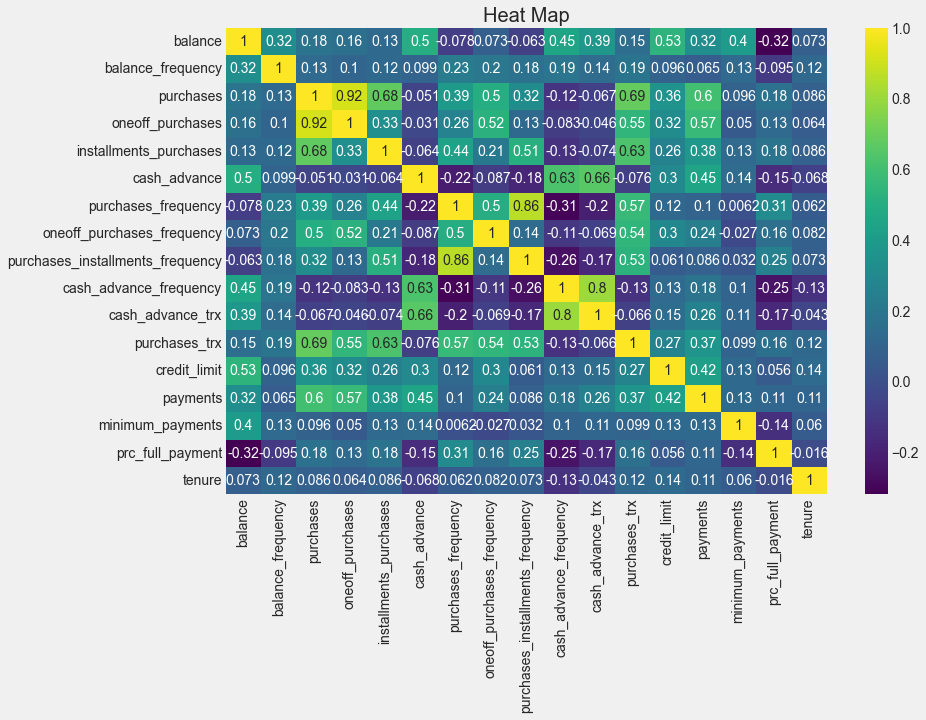

In [16]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(dataset.corr(), cmap='viridis', annot=True)
plt.title('Heat Map', fontsize =20)

Di sini kita bisa melihat korelasi dataset. <b>purchases</b> dan <b>oneoff_purchases</b> memiliki korelasi yang sangat tinggi seperti yang kita perkirakan pada 0,92. Ini sama untuk variabel dan bagian penghitung skor frekuensinya seperti  <b>cash advance trx</b> dan <b>cash advance frequency</b> di 0,8. Tidak heran hal seperti keseimbangan dan pembayaran memiliki korelasi yang buruk. Ini memberi tahu bahwa data memang masuk akal.

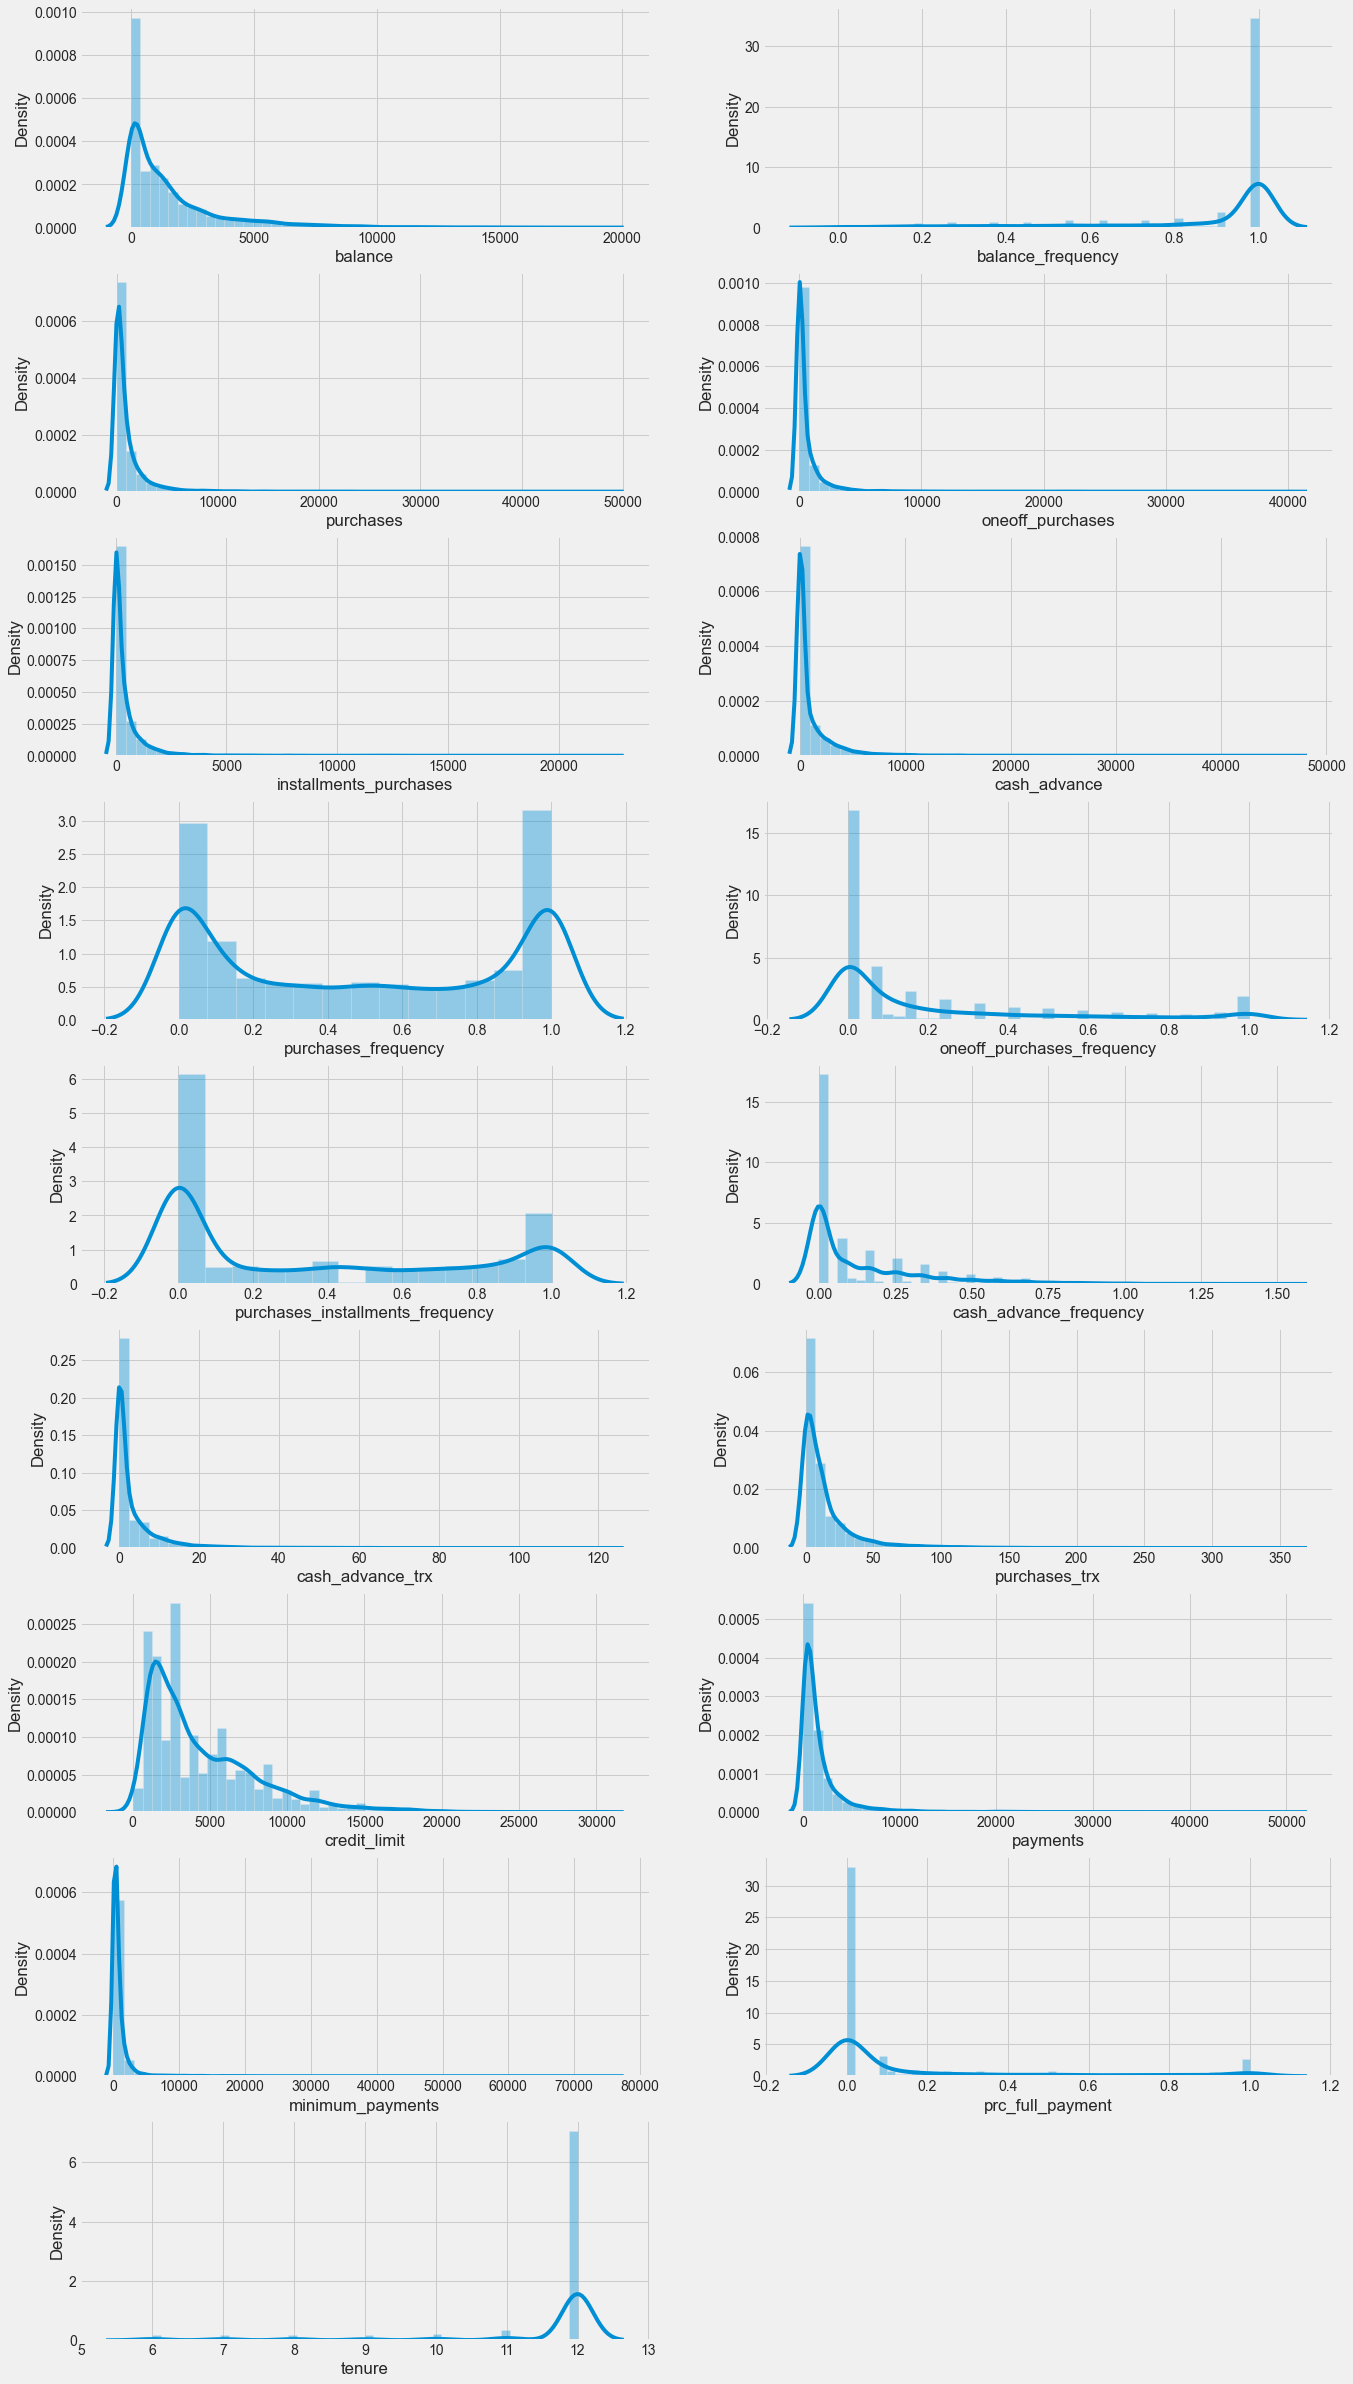

In [17]:
plt.rcParams['figure.figsize'] =(20,40)

for num in range(0,17):
    ax = plt.subplot(9,2,num+1)
    col = dataset.columns[num]
    sns.distplot(dataset[col], ax=ax)
    
# plt.savefig('all_dist.png')

Di atas adalah plot distribusi dari setiap variabel dalam dataset.
Di sini kita memiliki ikhtisar dari seluruh distribusi kerangka data. Kita dapat langsung melihat bahwa distribusi ini sangat miring ke kiri dan ada banyak nilai nol.

Text(0.5, 0, 'Balance')

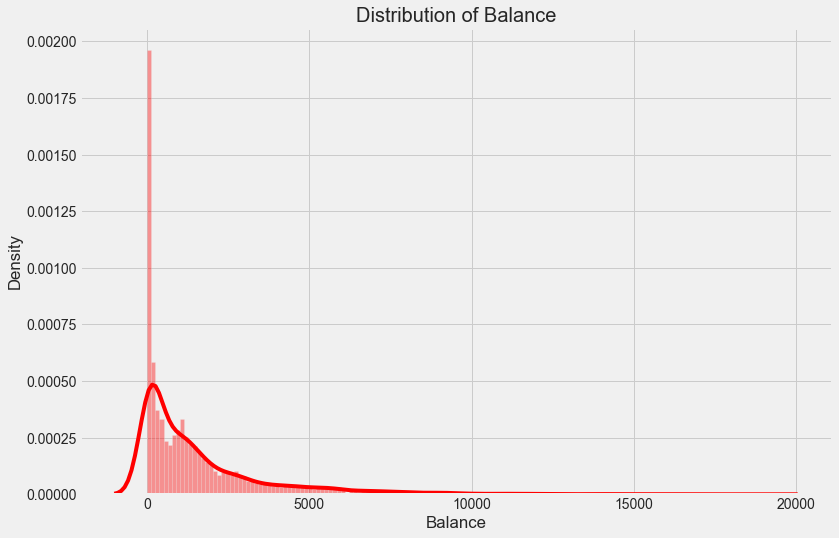

In [18]:
plt.rcParams['figure.figsize'] = (12,8)

sns.distplot(dataset['balance'],bins=150, color='red')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

In [19]:
dataset['balance'].value_counts(ascending=False)

0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: balance, Length: 8871, dtype: int64

Distribusi <b>"balance"</b> (jumlah total uang hutang anda kepada perusahaan kartu kredit) berkisar dari <b>0 dollar</b> hingga <b>20.000 dollar</b>. Disini terlihat sangat jelas ada jumlah kartu kredit yang sangat tinggi dengan saldo <b>0 dollar</b>. Ini bisa jadi karena orang memegang apa yang disebut "zero balance card". Ini artinya menjaga saldo Anda rendah (dalam hal ini 0 dollar) tetapi batas kreditnya tinggi, ini akan meningkatkan rasio pemanfaatan kredit dan meningkatkan skor kredit.

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

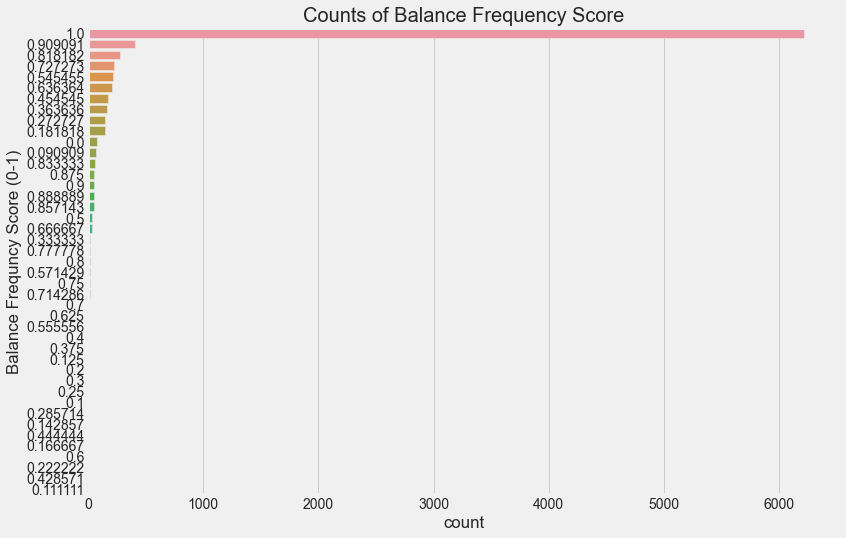

In [20]:
plt.rcParams['figure.figsize'] = (12,8)

sns.countplot(y=dataset['balance_frequency'],order = dataset['balance_frequency'].value_counts().index)
plt.ylabel('Balance Frequncy Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

Frekuensi saldo adalah skor 0-1, yang diberikan ke akun berdasarkan seberapa sering saldo akun diperbarui. Salah satunya adalah skor tertinggi. Jadi pada dasarnya ini adalah ukuran seberapa sering orang menggunakan kartu kreditnya. Seperti yang dapat lihat di sini sebagian besar akun memiliki skor satu, skor terbaik, artinya kebanyakan orang sering menggunakan kartu kredit dan hanya sejumlah kecil orang yang menjaga kartu mereka relatif tidak aktif.

Text(0.5, 0, 'Purchases')

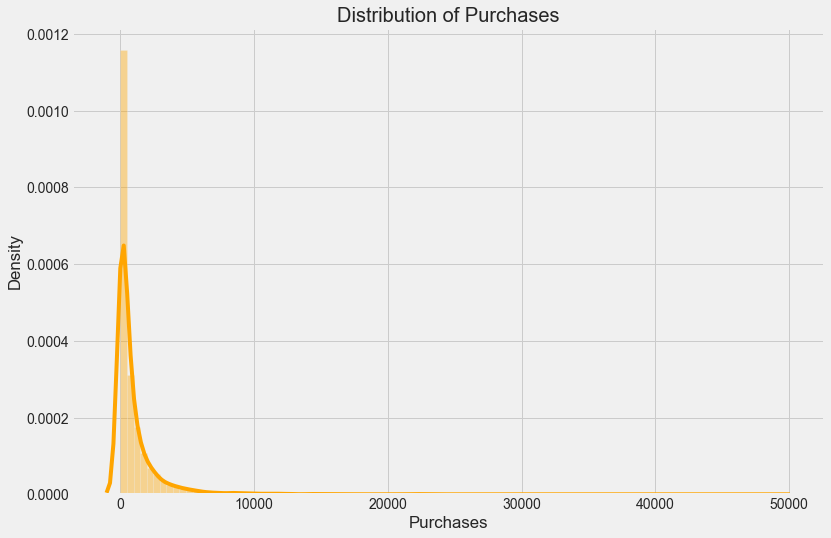

In [21]:
plt.rcParams['figure.figsize'] = (12,8)

sns.distplot(dataset['purchases'], color='orange', bins=100)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

Banyak orang memiliki jumlah pembelian 0. Ini berbanding lurus karena sebelumnya juga dapat dilihat bahwa banyak orang memegang kartu saldo nol.

Text(0.5, 0, 'Amount')

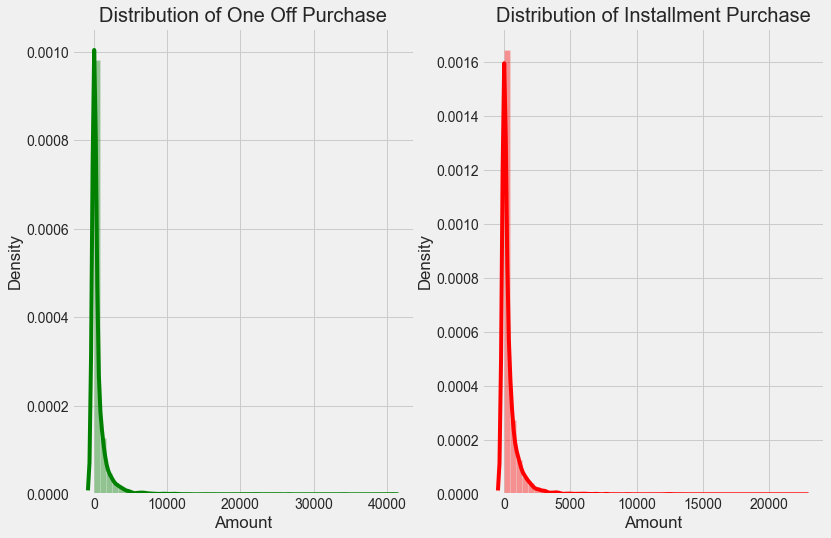

In [22]:
plt.subplot(1,2,1)
sns.distplot(dataset['oneoff_purchases'], color='green')
plt.title('Distribution of One Off Purchase', fontsize = 20)
plt.xlabel('Amount')


plt.subplot(1,2,2)
sns.distplot(dataset['installments_purchases'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 20)
plt.xlabel('Amount')

Plot diatas merupakan perbandingan antara distribusi pembelian satu kali dan pembelian angsuran.

Pembelian satu kali naik hingga lebih dari 40.000 dolar sedangkan pembelian cicilan tertinggi naik menjadi sekitar 25.000 dolar.

Text(0, 0.5, 'Credit limit')

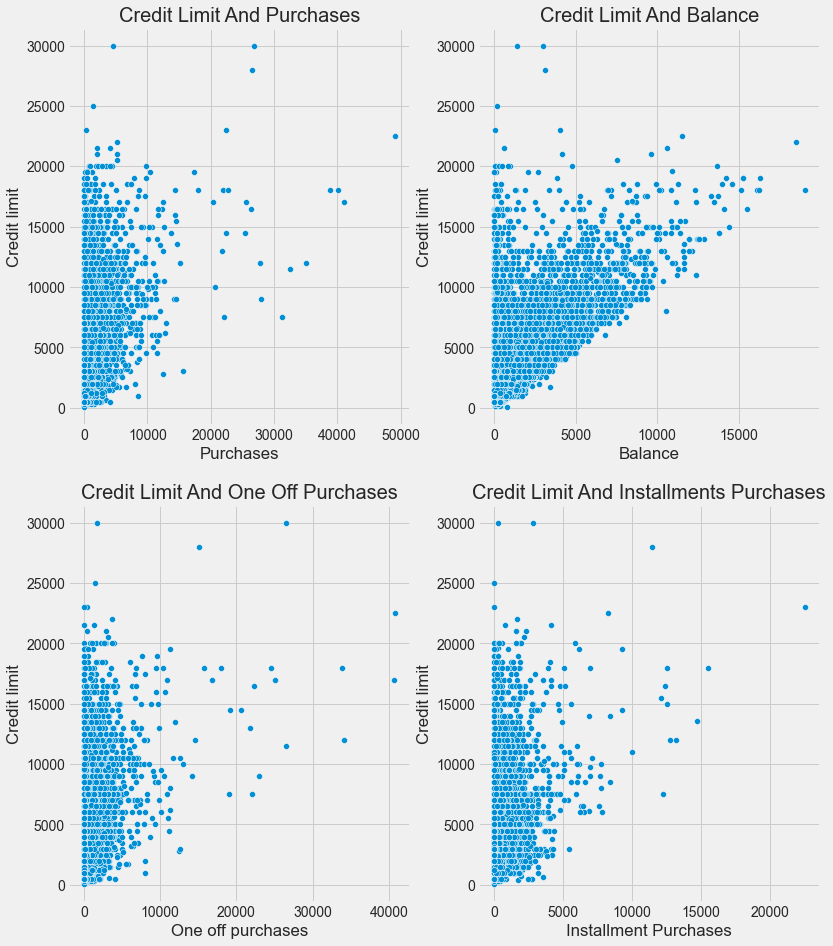

In [23]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(dataset['purchases'], dataset['credit_limit'])
plt.title('Credit Limit And Purchases', fontsize =20)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(dataset['balance'], dataset['credit_limit'])
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(dataset['oneoff_purchases'] ,dataset['credit_limit'])
plt.title('Credit Limit And One Off Purchases', fontsize =20)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(dataset['installments_purchases'], dataset['credit_limit'])
plt.title('Credit Limit And Installments Purchases', fontsize =20)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

Data di atas adalah scatterplot antara <b>credit_limit</b> dengan <b>saldo dan berbagai jenis pembelian</b>

Tampaknya tidak ada korelasi yang kuat antara <b>credit_limit</b> dan variabel-variabel tersebut. Bahkan, jumlah pembelian cenderung tetap nol sementara batas kredit meningkat. Ini menunjukkan bahwa pengguna kartu kredit benar-benar ingin menjaga saldo mereka tetap rendah untuk memanfaatkan kredit mereka. Ini mungkin menandakan bahwa, kartu kredit adalah alat untuk pemanfaatan kredit daripada alat belanja.

Adapun keseimbangan, tampaknya ada korelasi yang lebih baik bahwa ketika credit_limit naik, balance juga naik tetapi juga jelas untuk melihat bahwa ada juga poin di mana balance tetap nol tetapi credit_limit naik.

Text(0.5, 0, 'Purchases')

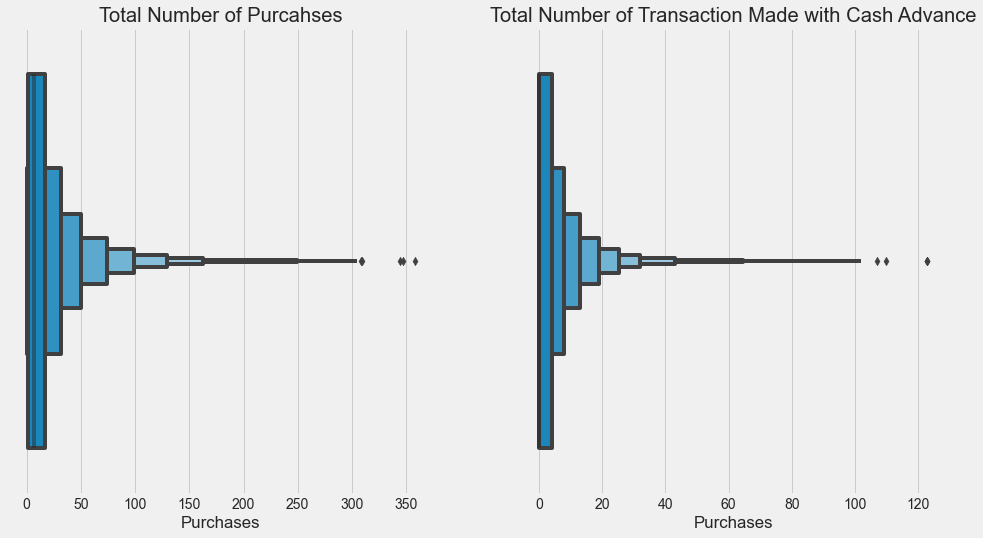

In [24]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1)
sns.boxenplot(dataset['purchases_trx'])
plt.title('Total Number of Purcahses')
plt.xlabel('Purchases')

plt.subplot(1,2,2)
sns.boxenplot(dataset['cash_advance_trx'])
plt.title('Total Number of Transaction Made with Cash Advance')
plt.xlabel('Purchases')

Di atas adalah plot kotak dari jumlah total <b>purchases_trx</b> dan <b>cash_advance_trx</b>.

Seperti yang diharapkan, ada sejumlah besar orang dengan jumlah transaksi yang rendah karena kita berasumsi bahwa orang menggunakan kartu kredit untuk pemanfaatan kredit dan bukan untuk pembelian. Dan hanya ada beberapa orang yang membeli dengan kuantitas tinggi. Beberapa orang purchases lebih dari 300 kali dan lebih sedikit yang melakukan lebih dari 100 kali dengan cash_advance_trx.

Text(0.5, 0, 'Months')

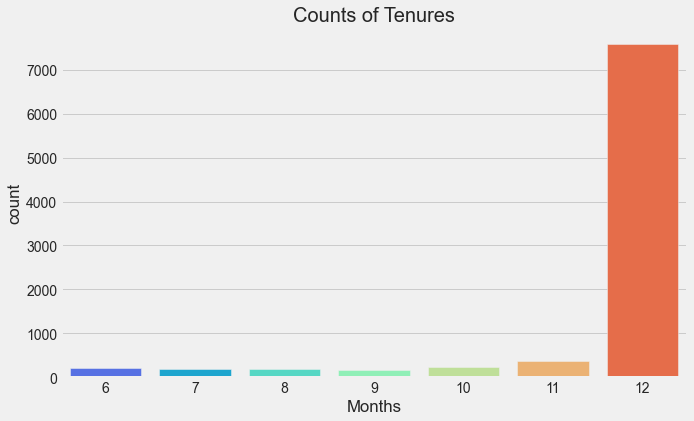

In [25]:
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(dataset['tenure'], palette='rainbow')
plt.title('Counts of Tenures', fontsize = 20)
plt.xlabel('Months')

Tenor adalah jangka waktu pelunasan kartu, berkisar antara 6-12 bulan. Menariknya sebagian besar kartu adalah kartu 12 bulan. Semakin lama masa tenor, semakin banyak tingkat bunga yang dibayarkan.

## Data Preprocessing

### Scaling Data

In [26]:
scaler = StandardScaler()

In [27]:
df_scaler = pd.DataFrame(scaler.fit_transform(dataset), index=dataset.index, columns = dataset.columns)
df_scaler

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-0.338305,0.329200,-4.122768


## Clustering

In [28]:
data = dataset.copy()

### K-Means

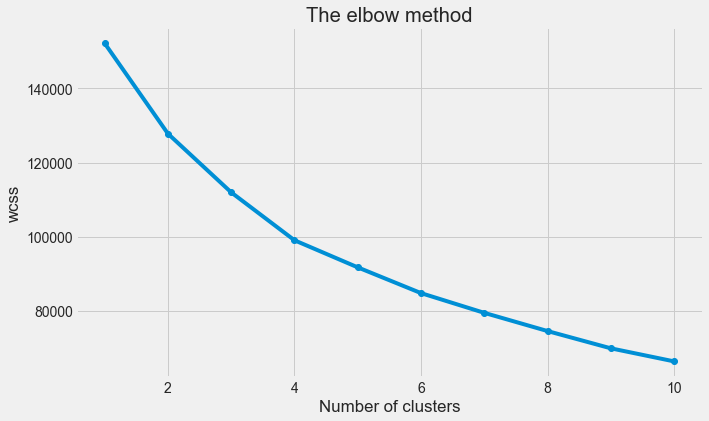

In [29]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaler)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)
kmeans.fit(df_scaler)
pred = kmeans.predict(df_scaler)

In [31]:
#Building the model at 4 clusters, add the label to the dataframe
data['Cluster KMeans'] = pred
data['Cluster KMeans'].value_counts()

3    3978
0    3366
1    1197
2     409
Name: Cluster KMeans, dtype: int64

Klaster 0 = Pembelanja tertinggi<br>
kluster 1 = Pembelanja sedang<br>
kluster 2 = Pembelanja rendah<br>
kluster 3 = Saldo nol & pembelanja rendah

In [32]:
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Cluster KMeans
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [33]:
data_transf_kmeans = data.groupby('Cluster KMeans').mean()
data_transf_kmeans

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
Cluster KMeans,,,,,,,,,,,,,,,,,
0,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,639.740452,0.269313,11.594474
1,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
3,1012.745945,0.789977,270.213240,210.016021,60.464108,597.051145,0.170249,0.086322,0.080642,0.114901,2.125943,2.907240,3278.569076,975.085151,553.868540,0.077983,11.446707


In [34]:
data_transf_kmeans.rename({0:'Pembelanja tertinggi', 1:'Pembelanja sedang', 2:'Pembelanja rendah', 3:'Saldo nol & pembelanja rendah'})

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
Cluster KMeans,,,,,,,,,,,,,,,,,
Pembelanja tertinggi,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,639.740452,0.269313,11.594474
Pembelanja sedang,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
Pembelanja rendah,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
Saldo nol & pembelanja rendah,1012.745945,0.789977,270.213240,210.016021,60.464108,597.051145,0.170249,0.086322,0.080642,0.114901,2.125943,2.907240,3278.569076,975.085151,553.868540,0.077983,11.446707


In [35]:
data['Labels'] = data['Cluster KMeans'].map({0:'Pembelanja tertinggi', 1:'Pembelanja sedang', 2:'Pembelanja rendah', 
                                                   3:'Saldo nol & pembelanja rendah'})

data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Cluster KMeans,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3,Saldo nol & pembelanja rendah
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,Pembelanja sedang
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,Pembelanja tertinggi
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3,Saldo nol & pembelanja rendah
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3,Saldo nol & pembelanja rendah


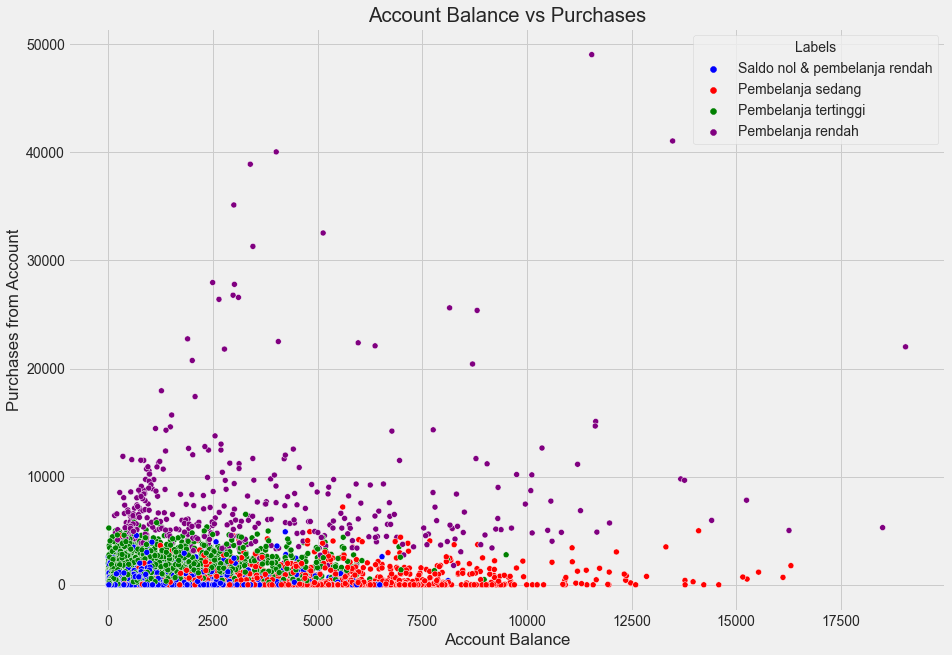

In [36]:
plt.figure(figsize=(14,10))
X = data['balance']
Y = data['purchases']
g = sns.scatterplot(X, Y, hue = data['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_xlabel('Account Balance')
g.set_ylabel('Purchases from Account')
g.set_title('Account Balance vs Purchases')
plt.show()

Di sini kita bisa melihat bahwa cluster 0 adalah orang-orang yang banyak berbelanja dengan saldo tertinggi sedangkan cluster 1 adalah orang-orang yang memiliki saldo lebih tinggi tetapi tidak banyak pembelanja. Cluster 2,3 adalah orang yang tidak banyak berbelanja dan memiliki saldo yang relatif lebih rendah (turun ke nol).

#### Performance Measure tiap Cluster

In [37]:
# cluster 2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=0)
kmeans.fit(df_scaler)
pred = kmeans.predict(df_scaler)

## Performance Measure
db_index2 = davies_bouldin_score(df_scaler, pred)
print(db_index2)

1.912128256522874


In [38]:
# cluster 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=0)
kmeans.fit(df_scaler)
pred = kmeans.predict(df_scaler)

## Performance Measure
db_index3 = davies_bouldin_score(df_scaler, pred)
print(db_index3)

1.5967371559269719


In [39]:
# cluster 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)
kmeans.fit(df_scaler)
pred = kmeans.predict(df_scaler)

## Performance Measure
db_index4 = davies_bouldin_score(df_scaler, pred)
print(db_index4)

1.5748908544926041


In [40]:
# cluster 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=0)
kmeans.fit(df_scaler)
pred = kmeans.predict(df_scaler)

## Performance Measure
db_index5 = davies_bouldin_score(df_scaler, pred)
print(db_index5)

1.5014945361356582


### PCA

In [41]:
#memproyeksikan data dimensi yang lebih tinggi

from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit(df_scaler)

In [42]:
print('Explained variation per principal component:{}'.format(pca.explained_variance_ratio_))

Explained variation per principal component:[2.72973970e-01 2.03137134e-01 8.81330137e-02 7.47940014e-02
 6.22478774e-02 5.73952684e-02 4.88391462e-02 4.29946812e-02
 3.79821357e-02 3.08003642e-02 2.37225688e-02 1.77338610e-02
 1.42791437e-02 1.21691357e-02 1.01266773e-02 2.67033642e-03
 6.85226801e-07]


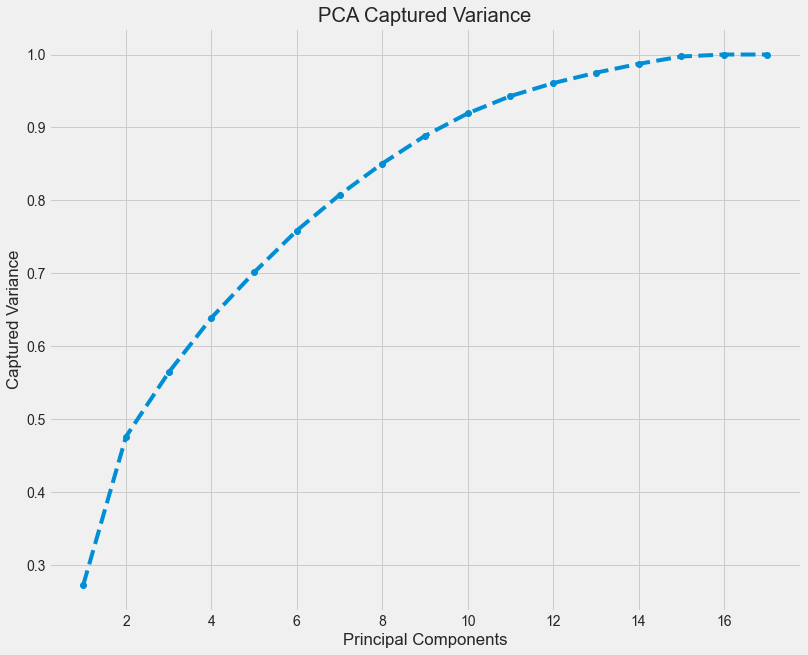

In [43]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('PCA Captured Variance')
plt.xlabel('Principal Components')
plt.ylabel('Captured Variance')
plt.show()

Kami menggunakan PCA lagi sehingga kami dapat mengurangi data menjadi 2 komponen, untuk memvisualisasikan cluster kami dengan lebih baik

In [44]:
pca = PCA(n_components=2, random_state=0)
pca.fit(df_scaler)
pca.components_

array([[ 0.10172563,  0.12048192,  0.41156601,  0.34633694,  0.33676437,
        -0.02281908,  0.32123637,  0.29449437,  0.27449856, -0.08859005,
        -0.04814391,  0.39060269,  0.21188664,  0.26647893,  0.06326542,
         0.13183651,  0.08107505],
       [ 0.40381966,  0.13133576,  0.04004024,  0.06193195, -0.0191646 ,
         0.43902716, -0.19114243, -0.01855323, -0.17886356,  0.4341202 ,
         0.41964292, -0.02015563,  0.23802936,  0.25672452,  0.16906693,
        -0.19006252, -0.00427084]])

In [45]:
data_pca = pd.DataFrame(data = pca.components_,
                           columns = dataset.columns.values,
                           index = ['Component 1', 'Component 2'])
data_pca

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
Component 1,0.101726,0.120482,0.411566,0.346337,0.336764,-0.022819,0.321236,0.294494,0.274499,-0.08859,-0.048144,0.390603,0.211887,0.266479,0.063265,0.131837,0.081075
Component 2,0.403820,0.131336,0.040040,0.061932,-0.019165,0.439027,-0.191142,-0.018553,-0.178864,0.43412,0.419643,-0.020156,0.238029,0.256725,0.169067,-0.190063,-0.004271


In [46]:
pca_scores = pca.transform(df_scaler)
pca_scores

array([[-1.68362605, -1.07230075],
       [-1.13417401,  2.50910255],
       [ 0.96936728, -0.38358267],
       ...,
       [-0.92889822, -1.80801688],
       [-2.33778069, -0.65360697],
       [-0.55795527, -0.40058274]])

#### Features yang paling mempengaruhi komponen

In [47]:
n_pcs= pca.components_.shape[0]

In [48]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [49]:
initial_feature_names = ['balance','balance_freq','purchases','oneoff_purchases','install_purchases', 'cash_advance', 'purchases_freq', 'oneoff_purchases_freq',
                        'purchases_install_freq', 'cash_advance_freq', 'cash_advance_trx', 'purchases_trx',
                        'credit_limit', 'payments', 'minim_payments', 'prc_full_pay', 'tenure']

In [50]:
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [51]:
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

,0,1
0,PC1,purchases
1,PC2,cash_advance


#### PCA + KMEANS

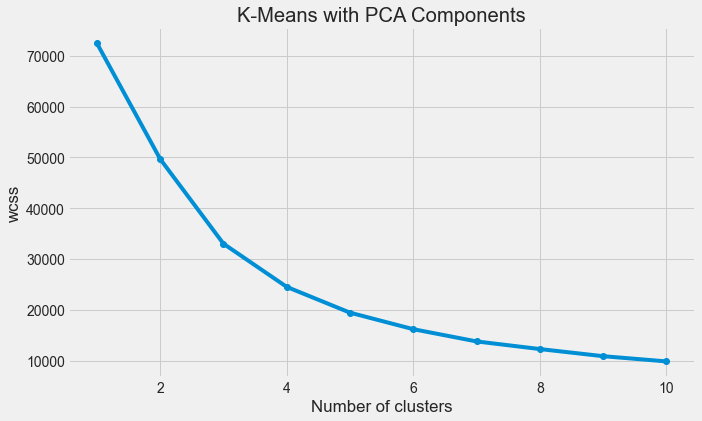

In [52]:
wcss = []

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('K-Means with PCA Components')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)
kmeans_pca.fit(pca_scores)
pred_pca = kmeans_pca.predict(pca_scores)

In [54]:
data_pca_kmeans = pd.concat([dataset.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
data_pca_kmeans.columns.values[-2:] = ['Component 1', 'Component 2']

data_pca_kmeans['Cluster KMeans+PCA'] = pred_pca
data_pca_kmeans['Cluster KMeans+PCA'].value_counts()

2    3916
0    3283
1    1246
3     505
Name: Cluster KMeans+PCA, dtype: int64

Klaster 0 = Pembelanja tertinggi<br>
kluster 1 = Pembelanja sedang<br>
kluster 2 = Pembelanja rendah<br>
kluster 3 = Saldo nol & pembelanja rendah

In [55]:
data_pca_kmeans.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Component 1,Component 2,Cluster KMeans+PCA
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-1.683626,-1.072301,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.134174,2.509103,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.969367,-0.383583,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.888250,0.004622,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-1.600012,-0.683861,2


In [56]:
data_transf_pca = data_pca_kmeans.groupby('Cluster KMeans+PCA').mean()
data_transf_pca

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Component 1,Component 2
Cluster KMeans+PCA,,,,,,,,,,,,,,,,,,,
0,825.081199,0.920111,1235.603539,621.569592,614.239092,147.791706,0.862322,0.301924,0.674788,0.030733,0.571429,21.303076,4252.442965,1329.082503,575.695277,0.282703,11.661590,0.908490,-1.167522
1,4505.865912,0.963515,462.628331,300.247673,162.479912,4400.456157,0.266446,0.129792,0.166388,0.470794,13.773676,6.717496,7449.201080,3542.539456,2060.458227,0.034992,11.439807,-0.530081,3.420432
2,1011.170871,0.799573,222.734060,157.205986,65.857357,613.583627,0.189877,0.074726,0.109848,0.122373,2.259448,2.949694,3109.013734,855.074195,550.380187,0.066180,11.363892,-1.365157,-0.196315
3,3404.463516,0.988473,6878.287842,4498.958931,2380.517030,772.147388,0.954623,0.725605,0.809703,0.084800,2.358416,82.760396,9520.693069,6704.524571,1879.778621,0.286873,11.960396,5.987848,0.673047


In [57]:
data_pca_kmeans['Labels'] = data_pca_kmeans['Cluster KMeans+PCA'].map({0:'Pembelanja tertinggi', 1:'Pembelanja sedang', 2:'Pembelanja rendah', 
                                                                       3:'Saldo nol & pembelanja rendah'})

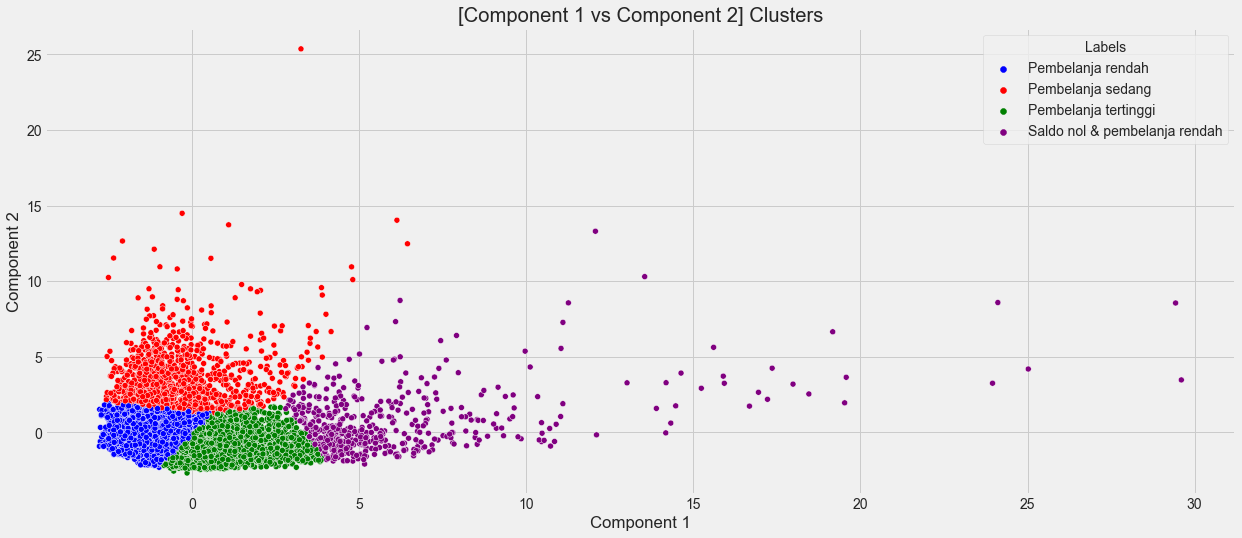

In [58]:
plt.figure(figsize=(19,8))
X = data_pca_kmeans['Component 1']
Y = data_pca_kmeans['Component 2']
g = sns.scatterplot(X, Y, hue = data_pca_kmeans['Labels'], palette = ['blue', 'red', 'green', 'purple'])
g.set_title('[Component 1 vs Component 2] Clusters')
plt.show()

Di sini kita bisa melihat bahwa cluster 0 adalah orang-orang yang banyak berbelanja dengan saldo tertinggi sedangkan cluster 1 adalah orang-orang yang memiliki saldo lebih tinggi tetapi tidak banyak pembelanja. Cluster 2,3 adalah orang yang tidak banyak berbelanja dan memiliki saldo yang relatif lebih rendah (turun ke nol).

#### Performance Measure tiap Cluster

In [59]:
# cluster 2
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state=0)
kmeans_pca.fit(pca_scores)
pred_pca = kmeans_pca.predict(pca_scores)

## Performance Measure
db_index_pca2 = davies_bouldin_score(pca_scores, pred_pca)
print(db_index_pca2)

0.9993908152328415


In [60]:
# cluster 3
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state=0)
kmeans_pca.fit(pca_scores)
pred_pca = kmeans_pca.predict(pca_scores)

## Performance Measure
db_index_pca3 = davies_bouldin_score(pca_scores, pred_pca)
print(db_index_pca3)

0.8118145627277737


In [61]:
# cluster 4
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)
kmeans_pca.fit(pca_scores)
pred_pca = kmeans_pca.predict(pca_scores)

## Performance Measure
db_index_pca4 = davies_bouldin_score(pca_scores, pred_pca)
print(db_index_pca4)

0.8010141619344634


In [62]:
# cluster 5
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state=0)
kmeans_pca.fit(pca_scores)
pred_pca = kmeans_pca.predict(pca_scores)

## Performance Measure
db_index_pca5 = davies_bouldin_score(pca_scores, pred_pca)
print(db_index_pca5)

0.7805725529238455


### Performance Measure

In [63]:
# --- Create Comparison Table ---
compare = pd.DataFrame({'Jumlah Cluster': ['2', '3', '4', '5'], 
                        'DBI KMeans': [db_index2, db_index3, db_index4, db_index5],
                       'DBI KMeans+PCA': [db_index_pca2, db_index_pca3, db_index_pca4, db_index_pca5]}).set_index('Jumlah Cluster')
compare

,DBI KMeans,DBI KMeans+PCA
Jumlah Cluster,,
2,1.912128,0.999391
3,1.596737,0.811815
4,1.574891,0.801014
5,1.501495,0.780573


In [64]:
data_compare = compare.transpose()
data_compare


Jumlah Cluster,2,3,4,5
DBI KMeans,1.912128,1.596737,1.574891,1.501495
DBI KMeans+PCA,0.999391,0.811815,0.801014,0.780573


model clustering K-Means dengan PCA dapat menghasilkan kualitas cluster yang lebih baik dibandingkan dengan K-Means biasa. hasil evaluasi cluster menunjukkan bahwa model clustering terbaik adalah K-Means dengan reduksi dimensi dataset menjadi 2 dimensi menggunakan PCA dengan nilai DB Index sebesar 0.780573. jumlah cluster yang terbentuk adalah 5

### Cluster Terbaik

In [65]:
kmeans_pca_ = KMeans(n_clusters = 5, init = 'k-means++', random_state=0)
kmeans_pca_.fit(pca_scores)
pred_pca_ = kmeans_pca_.predict(pca_scores)

In [66]:
data_pca_kmeans_ = pd.concat([dataset.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
data_pca_kmeans_.columns.values[-2:] = ['Component 1', 'Component 2']

data_pca_kmeans_['Cluster KMeans+PCA'] = pred_pca_
data_pca_kmeans_['Cluster KMeans+PCA'].value_counts()

1    3521
2    3242
0    1082
3    1026
4      79
Name: Cluster KMeans+PCA, dtype: int64

Klaster 0 = Pembelanja tertinggi<br>
kluster 1 = Pembelanja sedang<br>
kluster 2 = Pembelanja hemat<br>
kluster 3 = Pembelanjaan dengan mencicil<br>
kluster 4 = Saldo nol & pembelanja dengan mencicil<br>

In [67]:
data_pca_kmeans_.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Component 1,Component 2,Cluster KMeans+PCA
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-1.683626,-1.072301,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.134174,2.509103,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.969367,-0.383583,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.888250,0.004622,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-1.600012,-0.683861,1


In [68]:
data_pca_kmeans_['Labels'] = data_pca_kmeans_['Cluster KMeans+PCA'].map({0:'Pembelanja tertinggi', 1:'Pembelanja sedang', 2:'Pembelanja hemat', 
                                                                       3:'Pembelanjaan dengan mencicil', 4:'Saldo nol & pembelanjaan dengan mencicil'})

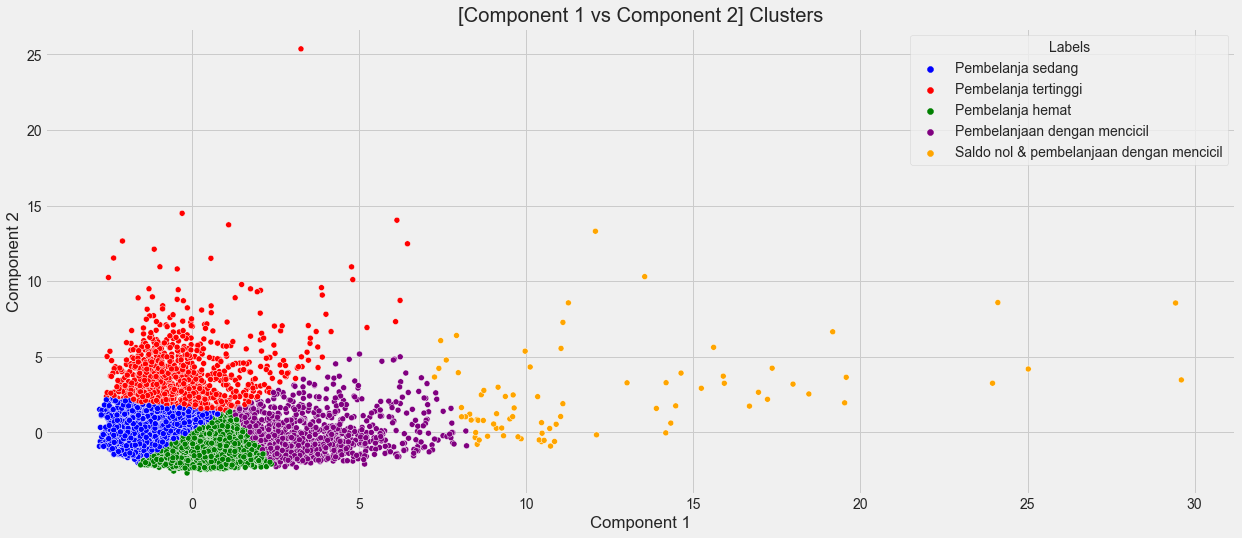

In [69]:
plt.figure(figsize=(19,8))
X = data_pca_kmeans_['Component 1']
Y = data_pca_kmeans_['Component 2']
g = sns.scatterplot(X, Y, hue = data_pca_kmeans_['Labels'], palette = ['blue', 'red', 'green', 'purple','orange'])
g.set_title('[Component 1 vs Component 2] Clusters')
plt.show()

Di sini kita bisa melihat bahwa cluster 0 adalah orang-orang yang banyak berbelanja dengan saldo tertinggi sedangkan cluster 1 adalah orang-orang yang memiliki saldo lebih tinggi tetapi tidak banyak pembelanja. Cluster 2,3,4 adalah orang yang tidak banyak berbelanja dan memiliki saldo yang relatif lebih rendah (turun ke nol).

## Save Model

In [70]:
import pickle

In [71]:
pickle.dump(kmeans_pca_, open('KMeans_PCA.pkl', 'wb'))

In [72]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [73]:
X_pred = [1499, 205.79]

In [74]:
pred_pca_ = kmeans_pca_.predict([X_pred])
pred_pca_

array([4])